In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def objective_function(u):
    F1 = u[0]**2 + u[1]**2  
    F2 = (u[0] - 1)**2 + (u[1] - 1)**2  
    return np.array([F1, F2])

In [3]:
def scalarize_linear(u, lambda_):
    F = objective_function(u)
    return lambda_[0] * F[0] + lambda_[1] * F[1]

lambda_values = np.arange(0, 1.1, 0.1)   
solutions = []

for lambda_ in lambda_values:
    scalarized_objective = lambda u: scalarize_linear(u, [lambda_, 1 - lambda_])
    res = minimize(scalarized_objective, [0, 0], bounds=[(-1, 1), (-1, 1)])
    solutions.append(res.x)


In [4]:
def epsilon_constraint(u, a):
    F = objective_function(u)
    return F[1]  # Minimalizujemy F2, a F1 ma ograniczenie

a_values = np.arange(0, 1.1, 0.1)  # Zakres dla ograniczeń F1
solutions_eps = []

for a in a_values:
    eps_objective = lambda u: epsilon_constraint(u, a)
    constraints = {'type': 'ineq', 'fun': lambda u: a - objective_function(u)[0]}  # F1 <= a
    res = minimize(eps_objective, [0, 0], bounds=[(-1, 1), (-1, 1)], constraints=constraints)
    solutions_eps.append(res.x)


In [5]:
def scalarize_distance(u, x, lambda_, p):
    F = objective_function(u)
    return lambda_ * np.linalg.norm(F - x, ord=p)

x_dom = np.array([0.5, 0.5])  # Punkt dominujący
p = 2  # Metryka Euklidesowa
solutions_dist = []

for lambda_ in lambda_values:
    distance_objective = lambda u: scalarize_distance(u, x_dom, lambda_, p)
    res = minimize(distance_objective, [0, 0], bounds=[(-1, 1), (-1, 1)])
    solutions_dist.append(res.x)

[[1.         1.        ]
 [0.9        0.9       ]
 [0.8        0.8       ]
 [0.7        0.7       ]
 [0.6        0.6       ]
 [0.49999999 0.49999999]
 [0.4        0.4       ]
 [0.29999999 0.29999999]
 [0.19999999 0.19999999]
 [0.09999999 0.09999999]
 [0.         0.        ]]
[[0.         0.        ]
 [0.2236068  0.2236068 ]
 [0.31622836 0.31622718]
 [0.38729833 0.38729833]
 [0.44721378 0.44721378]
 [0.50000001 0.50000004]
 [0.54772254 0.54772258]
 [0.59160798 0.59160798]
 [0.63245552 0.63245555]
 [0.67082039 0.67082039]
 [0.70710677 0.70710679]]
[[0.  0. ]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


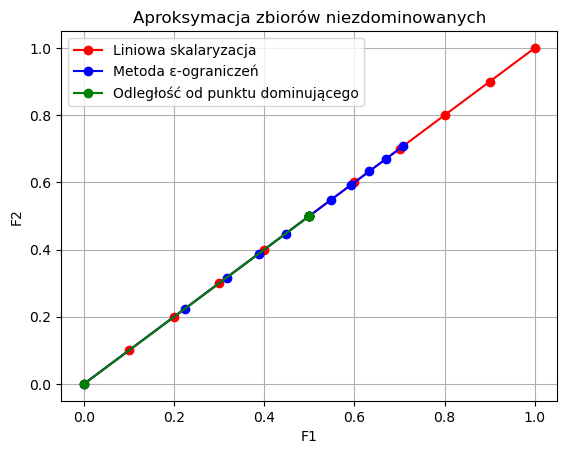

In [7]:
solutions = np.array(solutions)
solutions_eps = np.array(solutions_eps)
solutions_dist = np.array(solutions_dist)

print(solutions)
print(solutions_eps)
print(solutions_dist)

plt.plot(solutions[:, 0], solutions[:, 1], 'ro-', label='Liniowa skalaryzacja')
plt.plot(solutions_eps[:, 0], solutions_eps[:, 1], 'bo-', label='Metoda ε-ograniczeń')
plt.plot(solutions_dist[:, 0], solutions_dist[:, 1], 'go-', label='Odległość od punktu dominującego')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Aproksymacja zbiorów niezdominowanych')
plt.legend()
plt.grid(True)
plt.show()

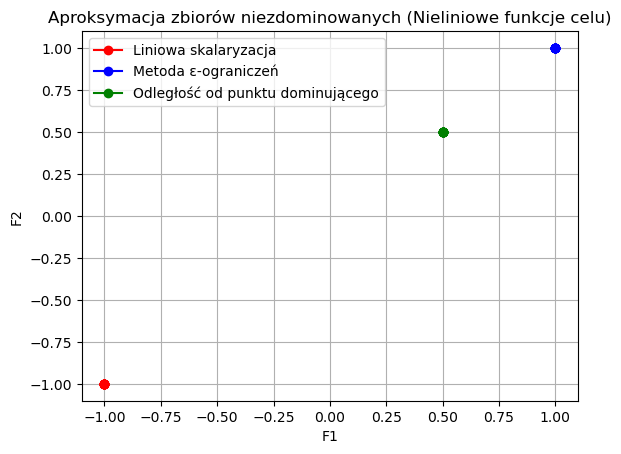

In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Zmodyfikowana funkcja celu
def objective_function(u):
    # Nieliniowe funkcje celu: F1 i F2
    F1 = u[0]**2 + u[1]**2  # Funkcja celu 1 z członem u[1]^3
    F2 = (u[0] - 1)**2 + (u[1] - 1)**2  # Funkcja celu 2 z członem u[0]^4
    return np.array([F1, F2])

# Skalaryzacja liniowa
def scalarize_linear(u, lambda_):
    F = objective_function(u)
    return lambda_[0] * F[0] + lambda_[1] * F[1]

# Ustawienie zakresów dla lambda i a
lambda_values = np.arange(2, 3.1, 0.1)  # Zakres lambda zaczynający się od 2
solutions = []

for lambda_ in lambda_values:
    scalarized_objective = lambda u: scalarize_linear(u, [lambda_, 1 - lambda_])
    res = minimize(scalarized_objective, [0, 0], bounds=[(-1, 1), (-1, 1)])
    solutions.append(res.x)

# Metoda ε-ograniczeń
def epsilon_constraint(u, a):
    F = objective_function(u)
    return F[1]  # Minimalizujemy F2, a F1 ma ograniczenie

a_values = np.arange(2, 3.1, 0.1)  # Zakres dla ograniczeń F1 zaczynający się od 2
solutions_eps = []

for a in a_values:
    eps_objective = lambda u: epsilon_constraint(u, a)
    constraints = {'type': 'ineq', 'fun': lambda u: a - objective_function(u)[0]}  # F1 <= a
    res = minimize(eps_objective, [0, 0], bounds=[(-1, 1), (-1, 1)], constraints=constraints)
    solutions_eps.append(res.x)

# Skalaryzacja przez odległość od punktu dominującego
def scalarize_distance(u, x, lambda_, p):
    F = objective_function(u)
    return lambda_ * np.linalg.norm(F - x, ord=p)

x_dom = np.array([0, 0])  # Punkt dominujący
p = 2  # Metryka Euklidesowa
solutions_dist = []

for lambda_ in lambda_values:
    distance_objective = lambda u: scalarize_distance(u, x_dom, lambda_, p)
    res = minimize(distance_objective, [0, 0], bounds=[(-1, 1), (-1, 1)])
    solutions_dist.append(res.x)

# Wizualizacja wyników
solutions = np.array(solutions)
solutions_eps = np.array(solutions_eps)
solutions_dist = np.array(solutions_dist)

plt.plot(solutions[:, 0], solutions[:, 1], 'ro-', label='Liniowa skalaryzacja')
plt.plot(solutions_eps[:, 0], solutions_eps[:, 1], 'bo-', label='Metoda ε-ograniczeń')
plt.plot(solutions_dist[:, 0], solutions_dist[:, 1], 'go-', label='Odległość od punktu dominującego')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Aproksymacja zbiorów niezdominowanych (Nieliniowe funkcje celu)')
plt.legend()
plt.grid(True)
plt.show()
